# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

637.4598895649211
777.5301967586624


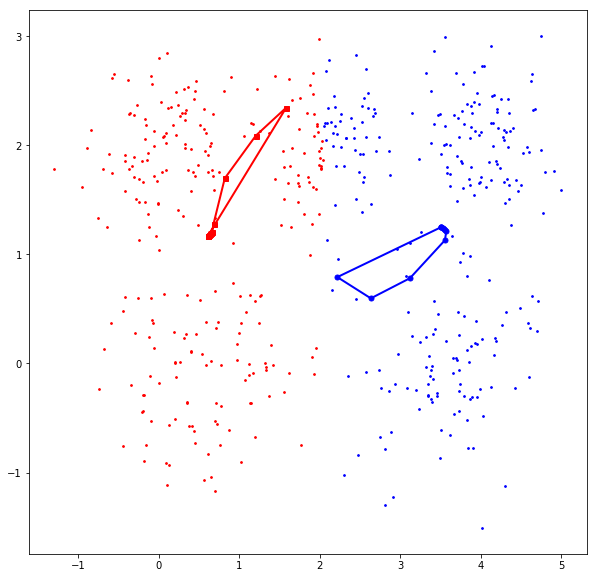

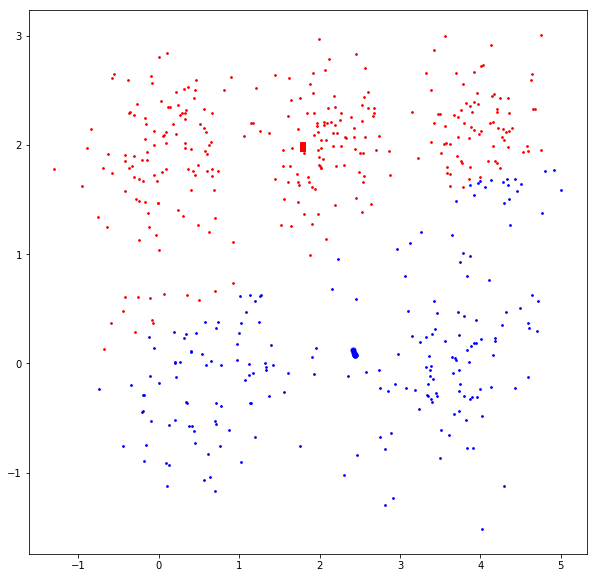

In [2]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
from scipy.spatial.distance import cdist
import copy

min_sd = float("inf")
max_sd = 0
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want

for i in range(1000):
    sd = 0
    idx, ctrs, iter_ctrs = kmeans(x, k)
    dist = cdist(x,ctrs)
    for i in range(k):
        idx1 = np.where(idx==i)
        sd += np.sum(dist[idx1, i])
    if sd > max_sd:
        max_sd = sd
        max_sd_idx = copy.deepcopy(idx)
        max_sd_ctrs = copy.deepcopy(ctrs)
        max_sd_iter_ctrs = copy.deepcopy(iter_ctrs)
    if sd < min_sd:
        min_sd = sd
        min_sd_idx = copy.deepcopy(idx)
        min_sd_ctrs = copy.deepcopy(ctrs)
        min_sd_iter_ctrs = copy.deepcopy(iter_ctrs)
        
print min_sd
print max_sd
#idx, ctrs, iter_ctrs = kmeans(x, k)
kmeans_plot(x, min_sd_idx, min_sd_ctrs, min_sd_iter_ctrs)
kmeans_plot(x, max_sd_idx, max_sd_ctrs, max_sd_iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

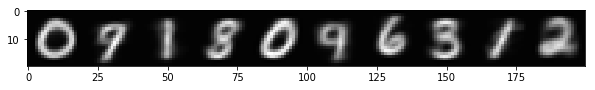

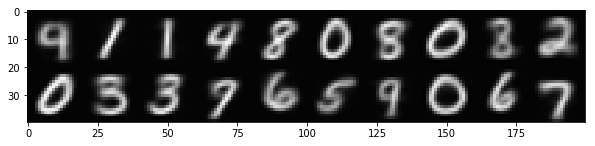

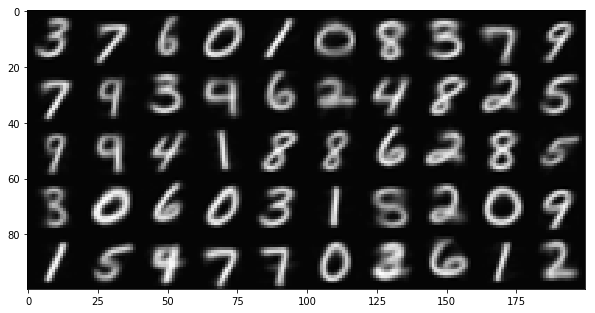

In [3]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

## Vector quantization
Compress images with K set to 8, 16, 32 and 64.

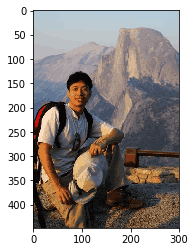

In [34]:
from kmeans import kmeans
from matplotlib.pyplot import imread
img = imread('sample0.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer

for k in [64]:
    idx, ctrs, _ = kmeans(fea, k)
    for i in range(k): 
        idx1 = np.where(idx==i)
        fea[idx1] = ctrs[i]
    plt.imshow(fea.reshape(img.shape).astype(np.uint8))
# end answer

plt.imshow(fea.reshape(img.shape).astype(np.uint8))


In [8]:
print fea.shape

(849600, 3)
